In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("clean_steam_data.csv")


In [5]:
data.columns

Index(['Required age', 'Price', 'DLC count', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Median playtime forever', 'Category_Captions available',
       'Category_Co-op', 'Category_Commentary available',
       'Category_Cross-Platform Multiplayer',
       'Category_Full controller support', 'Category_HDR available',
       'Category_In-App Purchases', 'Category_Includes Source SDK',
       'Category_Includes level editor', 'Category_LAN Co-op',
       'Category_LAN PvP', 'Category_MMO', 'Category_Mods',
       'Category_Mods (require HL2)', 'Category_Multi-player',
       'Category_Online Co-op', 'Category_Online PvP',
       'Category_Partial Controller Support', 'Category_PvP',
       'Category_Remote Play Together', 'Category_Remote Play on Phone',
       'Category_Remote Play on TV', 'Category_Remote Play on Tablet',
       'Category_Shared/Split Screen', 'Category_Shared/Split Screen Co-op',
       'Category_Shared/Split S

In [9]:
sample_size = 1000  # Adjust this based on your requirements

# Randomly sample the data
data_sample = data.sample(n=sample_size, random_state=42)  # Adjust random_state for reproducibility

# data_sample.columns


Index(['Required age', 'Price', 'DLC count', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Median playtime forever', 'Category_Captions available',
       'Category_Co-op', 'Category_Commentary available',
       'Category_Cross-Platform Multiplayer',
       'Category_Full controller support', 'Category_HDR available',
       'Category_In-App Purchases', 'Category_Includes Source SDK',
       'Category_Includes level editor', 'Category_LAN Co-op',
       'Category_LAN PvP', 'Category_MMO', 'Category_Mods',
       'Category_Mods (require HL2)', 'Category_Multi-player',
       'Category_Online Co-op', 'Category_Online PvP',
       'Category_Partial Controller Support', 'Category_PvP',
       'Category_Remote Play Together', 'Category_Remote Play on Phone',
       'Category_Remote Play on TV', 'Category_Remote Play on Tablet',
       'Category_Shared/Split Screen', 'Category_Shared/Split Screen Co-op',
       'Category_Shared/Split S

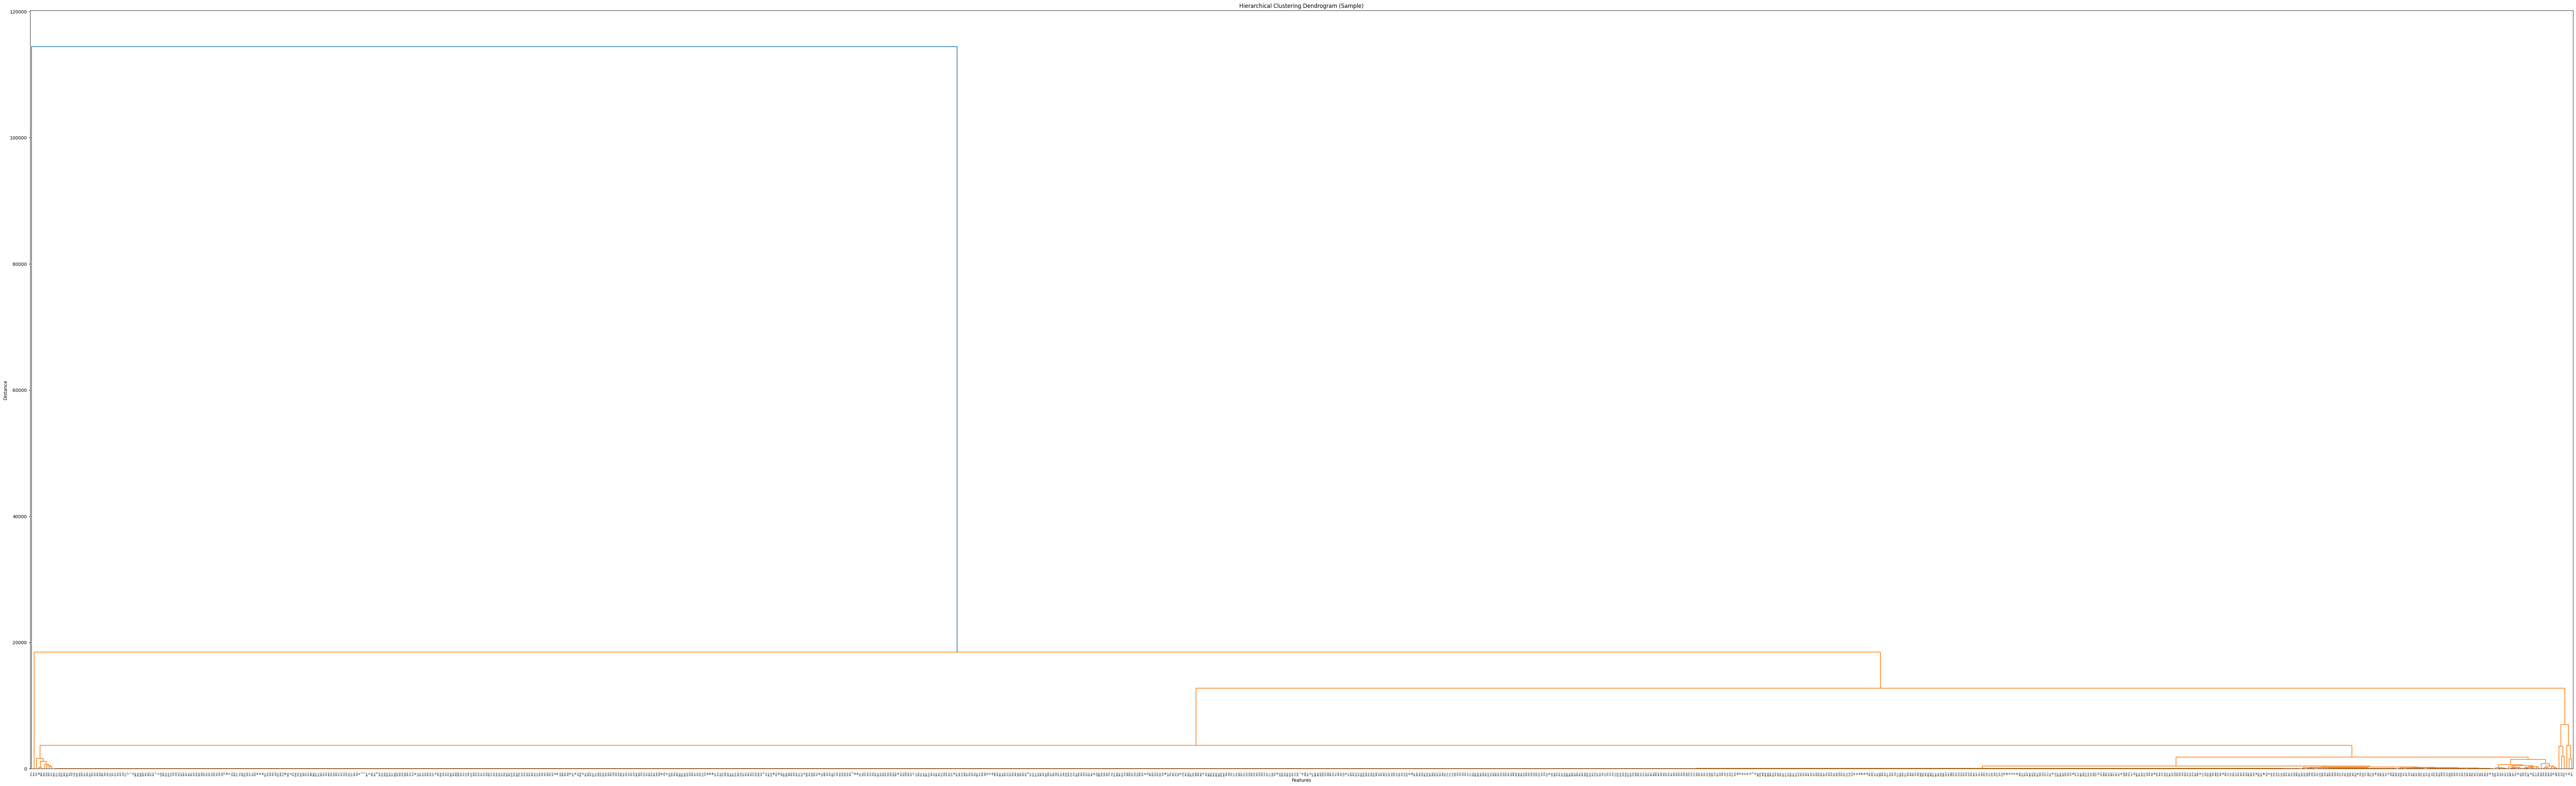

In [17]:
# Perform hierarchical clustering on the sample
linkage_data = linkage(data_sample, method='ward', metric='euclidean')
# print(data_sample.shape)
# print(linkage_data.shape)
# Visualize the dendrogram
# column_names = data_sample.columns.tolist()

plt.figure(figsize=(100, 30))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram (Sample)')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

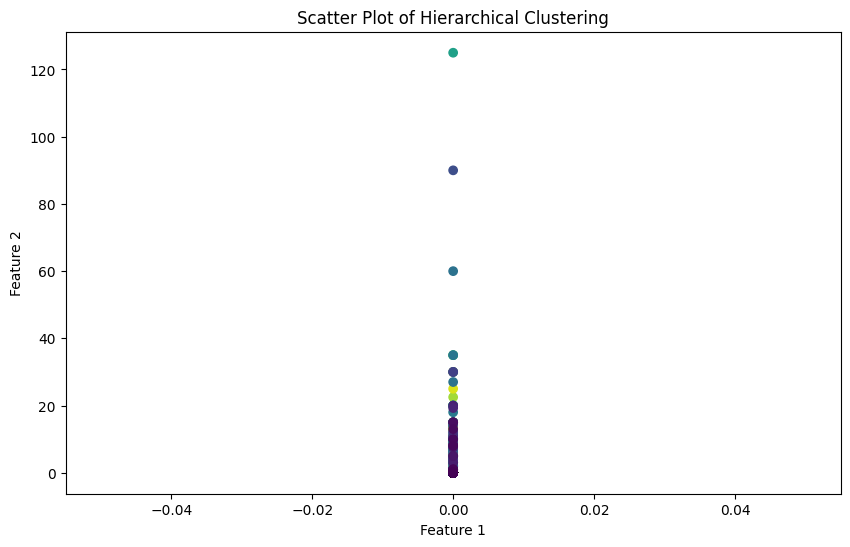

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(linkage_data)  # Fit the model to the linkage data

# Assign cluster labels to data points
cluster_labels = model.labels_

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_sample.iloc[1:, 0], data_sample.iloc[1:, 1], c=cluster_labels, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Hierarchical Clustering")
plt.show()